
# Support Vector Machines

Support Vector Machines (SVMs) are powerful supervised learning models used for classification and regression tasks. They are particularly effective in high-dimensional spaces and are known for their robustness against overfitting, especially in cases where the number of dimensions exceeds the number of samples.

SVMs work by finding the optimal hyperplane that separates different classes in the feature space. The key idea is to maximize the margin between the closest points of the classes, known as support vectors.

## Mathematical Formulation

Given a training set $\{(x_i, y_i)\}_{i = 1}^{n}$ where $y_i \in \{-1, 1\}$, the SVM aims to find a hyperplane defined by the equation: $$w^T x + b = 0,$$ where $w$ is the weight vector and $b$ is the bias term. The goal is to maximize the margin defined as: $$\text{Margin} = \frac{2}{\|w\|}.$$ This leads to the following optimization problem: $$\begin{align*} \text{minimize} & \quad \frac{1}{2} \|w\|^2 \\ \text{subject to} & \quad y_i (w^T x_i + b) \geq 1, \quad \forall i = 1, \ldots, n. \end{align*}$$ This is a convex optimization problem that can be solved using techniques like Lagrange multipliers or quadratic programming.

## Linear SVMs

Linear SVMs are used when the data is linearly separable. The algorithm finds the hyperplane that best separates the classes by maximizing the margin. The support vectors are the data points that lie closest to the hyperplane and are critical in defining its position. The hyperplane is defined by the equation: $$w^T x + b = 0,$$ where $w$ is the weight vector and $b$ is the bias term. The decision function for a new data point $x$ is given by: $$f(x) = \text{sign}(w^T x + b).$$

### Example of Linear SVM

To illustrate the concept of linear SVMs, we will use the Iris dataset, and keep only two features for visualization purposes. We will train a linear SVM model and visualize the decision boundary along with the support vectors.

-   Load the `iris` dataset

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, 2:4]
y = data.target

-   Train-test split

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

-   Create a Pipline for scaling and SVM and fit

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('svm', svm.SVC(kernel='linear', C=1.0))  # Linear SVM
])
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'


-   Plot the decision boundary

<Figure size 1000x600 with 0 Axes>

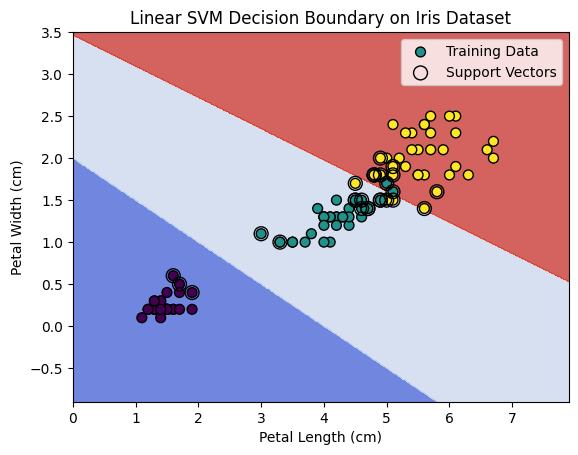

In [4]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(10, 6))
DecisionBoundaryDisplay.from_estimator(pipeline, X, response_method='predict',
                                       cmap=plt.cm.coolwarm, alpha=0.8,
                                       grid_resolution=500)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            edgecolors='k', marker='o', s=50, label='Training Data')
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test,
#             edgecolors='k', marker='o', s=50, label='Test Data')
# Scale the support vectors back to match the scaled features
support_vectors = pipeline.named_steps['svm'].support_vectors_
support_vectors_scaled = pipeline.named_steps['scaler'].inverse_transform(support_vectors)
plt.scatter(support_vectors_scaled[:, 0],
            support_vectors_scaled[:, 1],
            facecolors='none', s=100, edgecolors='k', label='Support Vectors')
plt.title('Linear SVM Decision Boundary on Iris Dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.show()

-   Evaluate the model

SVM Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



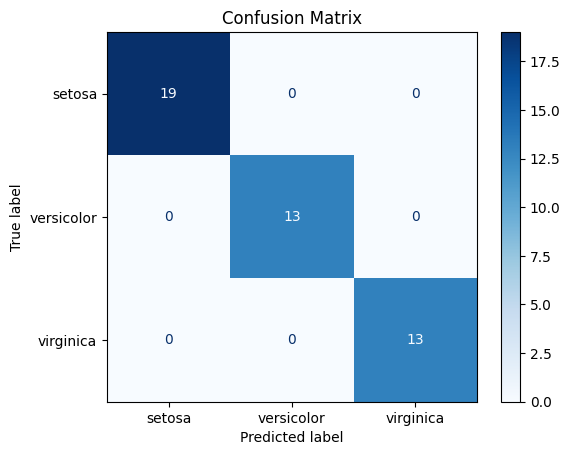

In [5]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=data.target_names))
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test, display_labels=data.target_names,
                                      cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

-   Cross-validation

In [6]:
import numpy as np
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f"Cross-Validation Score: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")

Cross-Validation Score: 0.96 ± 0.02


## Nonlinear SVMs

When the data is not linearly separable, SVMs can still be applied by transforming the input features into a higher-dimensional space where a linear separation is possible. This is achieved using kernel functions, which implicitly map the data into a higher-dimensional space without the need for explicit computation.

Mathematically, the optimization problem remains similar, but the decision function is modified to include a kernel function: $$f(x) = \sum_{i=1}^{n} \alpha_i y_i K(x_i, x) + b,$$ where $K(x_i, x)$ is the kernel function that computes the inner product in the transformed space, and $\alpha_i$ are the Lagrange multipliers.

### Example of Nonlinear SVM

-   Generate synthetic data for non-linear classification

In [7]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=100, noise=0.1, random_state=42)

-   Visualize the synthetic dataset

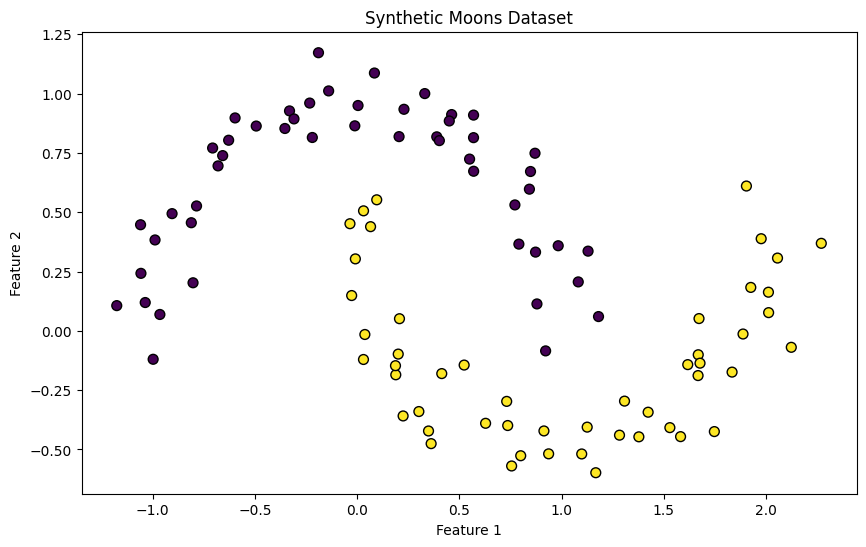

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, edgecolors='k', marker='o', s=50)
plt.title('Synthetic Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

-   Split the dataset into training and testing sets

In [9]:
X_train_moons, X_test_moons, y_train_moons, y_test_moons = \
    train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)

-   Create and train the SVM model with a radial basis function kernel

In [10]:
model_nonlinear = svm.SVC(kernel='rbf', gamma='scale', C=1.0)
model_nonlinear.fit(X_train_moons, y_train_moons)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


-   Plotting the decision boundary

<Figure size 1000x600 with 0 Axes>

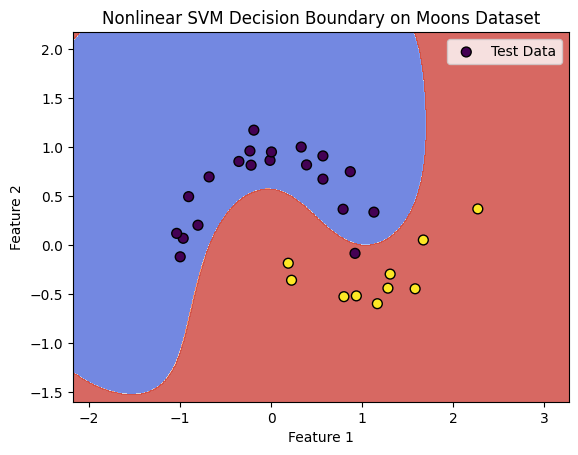

In [11]:
plt.figure(figsize=(10, 6))
DecisionBoundaryDisplay.from_estimator(model_nonlinear, X_moons, response_method='predict',
                                       cmap=plt.cm.coolwarm, alpha=0.8,
                                       grid_resolution=500)
# plt.scatter(X_train_moons[:, 0], X_train_moons[:, 1], c=y_train_moons,
#             edgecolors='k', marker='o', s=50, label='Training Data')
plt.scatter(X_test_moons[:, 0], X_test_moons[:, 1], c=y_test_moons,
            edgecolors='k', marker='o', s=50, label='Test Data')
plt.title('Nonlinear SVM Decision Boundary on Moons Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Kernel Trick

SVMs can efficiently handle non-linear decision boundaries using the kernel trick. Instead of explicitly mapping the data into a higher-dimensional space, SVMs use kernel functions to compute the inner products in that space. Common kernel functions include:

-   **Linear Kernel**: $K(x_i, x_j) = x_i^T x_j$
-   **Polynomial Kernel**: $K(x_i, x_j) = (x_i^T x_j + c)^d$
-   **Radial Basis Function (RBF) Kernel**: $K(x_i, x_j) = \exp\left(-\frac{\|x_i - x_j\|^2}{2\sigma^2}\right)$
-   **Sigmoid Kernel**: $K(x_i, x_j) = \tanh(\alpha x_i^T x_j + c)$

The choice of kernel allows SVMs to adapt to various data distributions and complexities.

## Advantages and Disadvantages

-   **Advantages**:
    -   Effective in high-dimensional spaces.
    -   Robust against overfitting, especially in high-dimensional datasets.
    -   Works well with clear margin of separation.
    -   Can handle non-linear decision boundaries using kernel functions.
-   **Disadvantages**:
    -   Computationally intensive, especially with large datasets.
    -   Requires careful tuning of hyperparameters (e.g., regularization parameter $C$ and kernel parameters).
    -   Less effective on noisy datasets with overlapping classes.

## SVMs as Regression Models

SVMs can also be used for regression tasks, known as Support Vector Regression (SVR). The main idea is similar to classification, where the goal is to find a function that approximates the relationship between input features and continuous output values. The optimization problem for SVR is formulated to minimize the error while maintaining a margin of tolerance around the predicted values. The SVR can also utilize kernel functions to handle non-linear relationships.

-   Generate synthetic data for regression

In [12]:
from sklearn.svm import SVR
X_reg = np.sort(5 * np.random.rand(80, 1), axis=0)
y_reg = np.sin(X_reg).ravel() + np.random.normal(0, 0.1, X_reg.shape[0])

-   Split the data into training and testing sets

In [13]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = \
    train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

-   Create a pipeline for scaling and SVR and fit

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline_reg = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.1))  # SVR with RBF kernel
])
pipeline_reg.fit(X_train_reg, y_train_reg)

,steps,"[('scaler', ...), ('svr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0


-   Evaluate the model

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_reg = pipeline_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"SVR Mean Squared Error: {mse:.2f}")
print(f"SVR R^2 Score: {r2:.2f}")

SVR Mean Squared Error: 0.01
SVR R^2 Score: 0.96


-   Plotting the SVR results

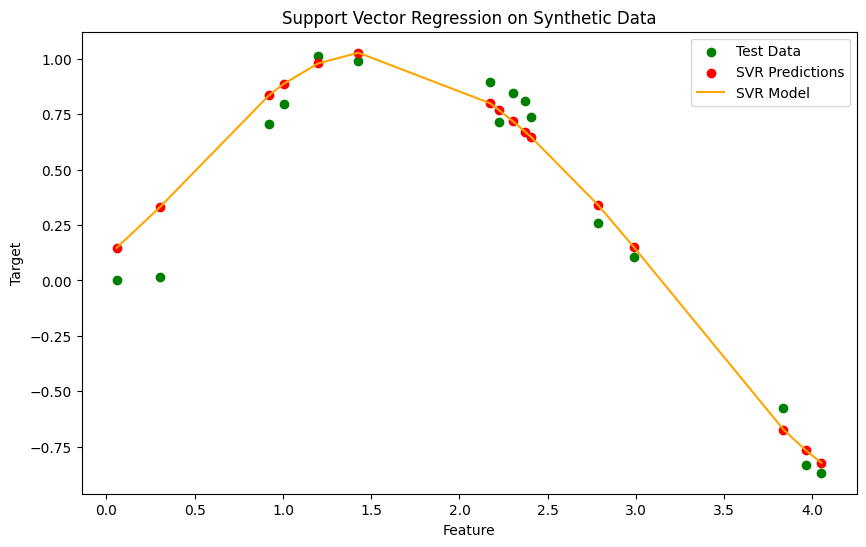

In [16]:
plt.figure(figsize=(10, 6))
# plt.scatter(X_train_reg, y_train_reg, color='blue', label='Training Data')
plt.scatter(X_test_reg, y_test_reg, color='green', label='Test Data')
plt.scatter(X_test_reg, y_pred_reg, color='red', label='SVR Predictions')
plt.plot(np.sort(X_test_reg, axis=0), pipeline_reg.predict(np.sort(X_test_reg, axis=0)),
         color='orange', label='SVR Model')
plt.title('Support Vector Regression on Synthetic Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

This code demonstrates how to use SVM for regression tasks, showing the model's predictions against the actual data points. The SVR is configured with a radial basis function kernel, allowing it to capture non-linear relationships in the data.

## Hands-on Exercises

-   **Experiment with Different Kernels**: Using the moons dataset, modify the SVM model to use different kernel functions (e.g., polynomial, sigmoid) and observe how the decision boundary changes. Compare the performance of each kernel using accuracy and confusion matrix.

Kernel: linear, Accuracy: 0.87


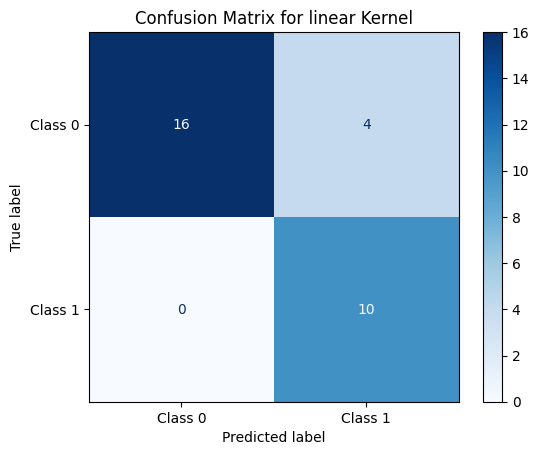

Kernel: poly, Accuracy: 0.87


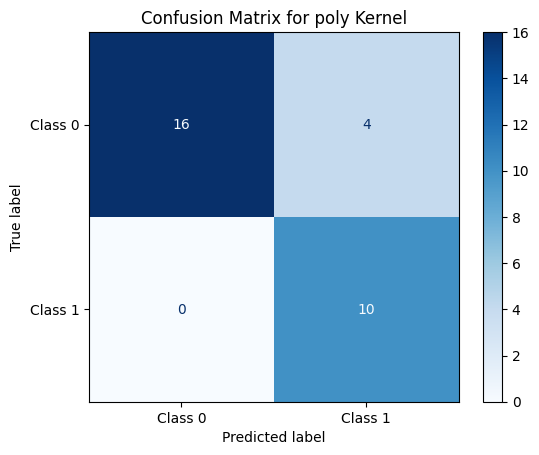

Kernel: rbf, Accuracy: 0.97


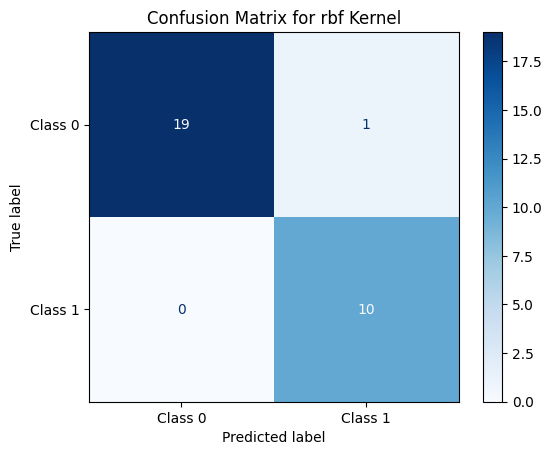

Kernel: sigmoid, Accuracy: 0.73


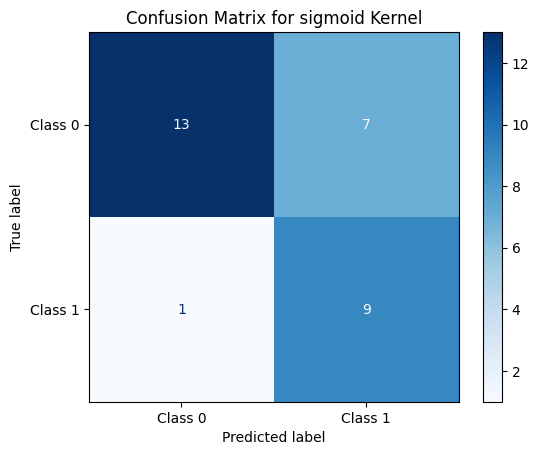

In [17]:
# Experiment with different kernels on the moons dataset
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    model = svm.SVC(kernel=kernel, gamma='scale', C=1.0)
    model.fit(X_train_moons, y_train_moons)
    y_pred = model.predict(X_test_moons)
    accuracy = accuracy_score(y_test_moons, y_pred)
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.2f}")
    ConfusionMatrixDisplay.from_estimator(model, X_test_moons, y_test_moons,
                                          display_labels=['Class 0', 'Class 1'],
                                          cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {kernel} Kernel')
    plt.show()

-   **Hyperparameter Tuning**: Use techniques like grid search or random search to find the optimal hyperparameters for the SVM model, such as the regularization parameter $C$ and kernel parameters. Evaluate the impact of these hyperparameters on model performance.

In [18]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'svm__C': [0.1, 0.3, 1.0, 3.0, 10.0, 30.0, 100.0],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train_moons, y_train_moons)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_moons)
accuracy_best = accuracy_score(y_test_moons, y_pred_best)
print(f"Best Model Accuracy: {accuracy_best:.2f}")

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters: {'svm__C': 3.0, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best cross-validation score: 1.00
Best Model Accuracy: 0.97


-   **Visualizing Decision Boundaries**: Create visualizations of the decision boundaries for different SVM models on the moons dataset. Use contour plots to illustrate how the decision boundaries change with different hyperparameters and kernels.

<Figure size 1200x800 with 0 Axes>

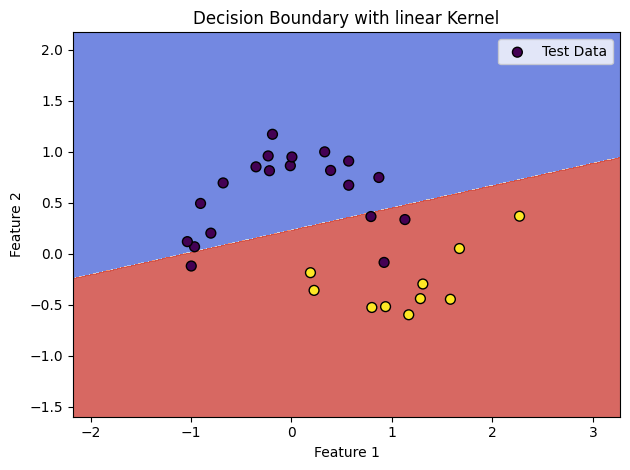

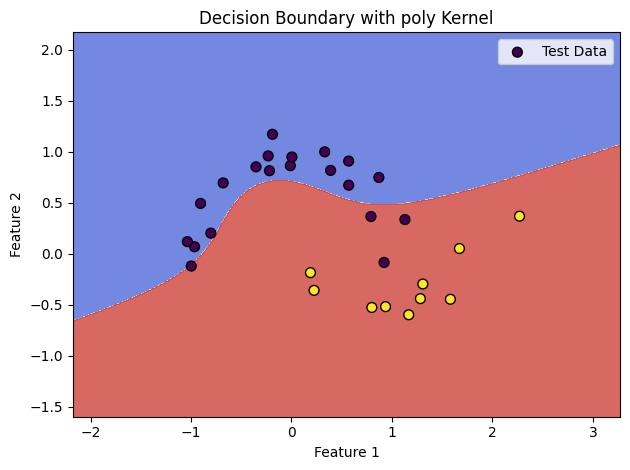

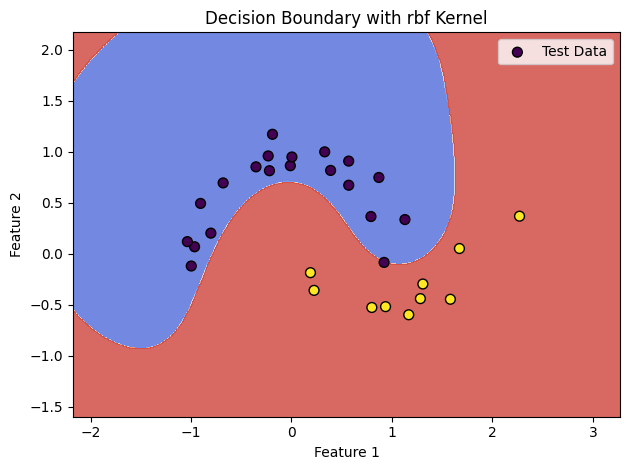

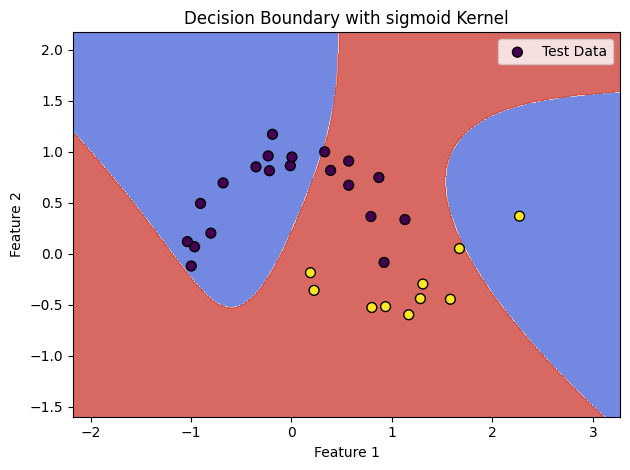

In [19]:
# Visualizing decision boundaries for different SVM models
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
plt.figure(figsize=(12, 8))
for i, kernel in enumerate(kernels):
      model = svm.SVC(kernel=kernel, gamma='scale', C=3.0)
      model.fit(X_train_moons, y_train_moons)
      DecisionBoundaryDisplay.from_estimator(model, X_moons, response_method='predict',
                                             cmap=plt.cm.coolwarm, alpha=0.8,
                                             grid_resolution=500)
      plt.scatter(X_test_moons[:, 0], X_test_moons[:, 1], c=y_test_moons,
                  edgecolors='k', marker='o', s=50, label='Test Data')
      plt.title(f'Decision Boundary with {kernel} Kernel')
      plt.xlabel('Feature 1')
      plt.ylabel('Feature 2')
      plt.legend()
      plt.tight_layout()
      plt.show()

-   **Support Vector Regression**: Implement a regression task using SVR on the following synthetic dataset: $$y = x^2 + \cos(2\pi x) + \epsilon,$$ where $\epsilon$ is Gaussian noise. Experiment with different kernel functions and hyperparameters, and evaluate the model's performance using metrics like mean squared error and $R^2$ score. Visualize the predictions against the actual data points to understand how well the SVR captures the underlying relationship.

SVR Mean Squared Error: 2.15
SVR R^2 Score: 0.95


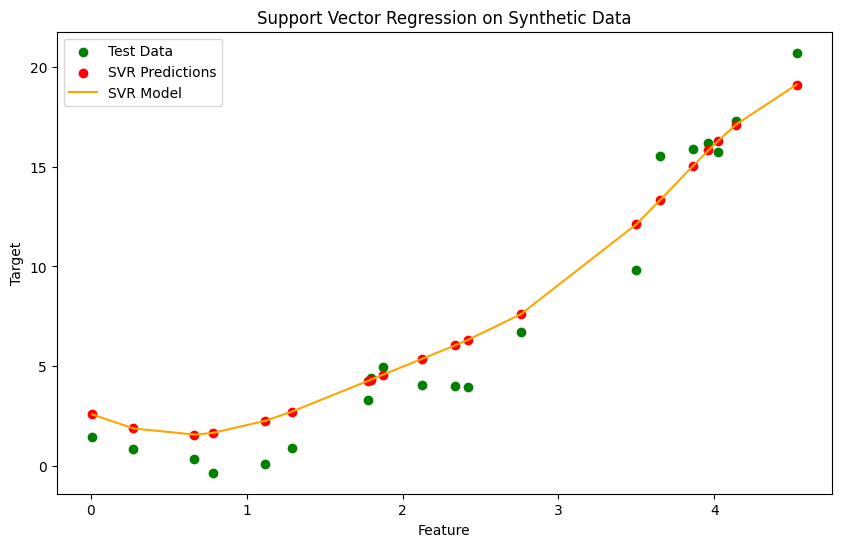

In [20]:
# Generate synthetic data for regression
n_samples = 100
X_reg = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
y_reg = X_reg**2 + np.cos(2 * np.pi * X_reg) + np.random.randn(n_samples, 1)
y_reg = y_reg.ravel()

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = \
    train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Create a pipeline for scaling and SVR
pipeline_reg = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.1))  # SVR with RBF kernel
])
# Fit the SVR model
pipeline_reg.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_reg = pipeline_reg.predict(X_test_reg)

# Evaluate the SVR model
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"SVR Mean Squared Error: {mse:.2f}")
print(f"SVR R^2 Score: {r2:.2f}")

# Plotting the SVR results
plt.figure(figsize=(10, 6))
# plt.scatter(X_train_reg, y_train_reg, color='blue', label='Training Data')
plt.scatter(X_test_reg, y_test_reg, color='green', label='Test Data')
plt.scatter(X_test_reg, y_pred_reg, color='red', label='SVR Predictions')
plt.plot(np.sort(X_test_reg, axis=0), pipeline_reg.predict(np.sort(X_test_reg, axis=0)),
         color='orange', label='SVR Model')
plt.title('Support Vector Regression on Synthetic Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()